# CLASSIFICATION USING ANN AND SVM

In [156]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# from jcopml library
from jcopml.plot import plot_missing_value

# from sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

In [157]:
data = pd.read_csv('Churn_Dataset.csv')

data.head(4)
print(data)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [159]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


,missing_value,%
RowNumber,0,0.0
CustomerId,0,0.0
Surname,0,0.0
CreditScore,0,0.0
Geography,0,0.0
Gender,0,0.0
Age,0,0.0
Tenure,0,0.0
Balance,0,0.0
NumOfProducts,0,0.0


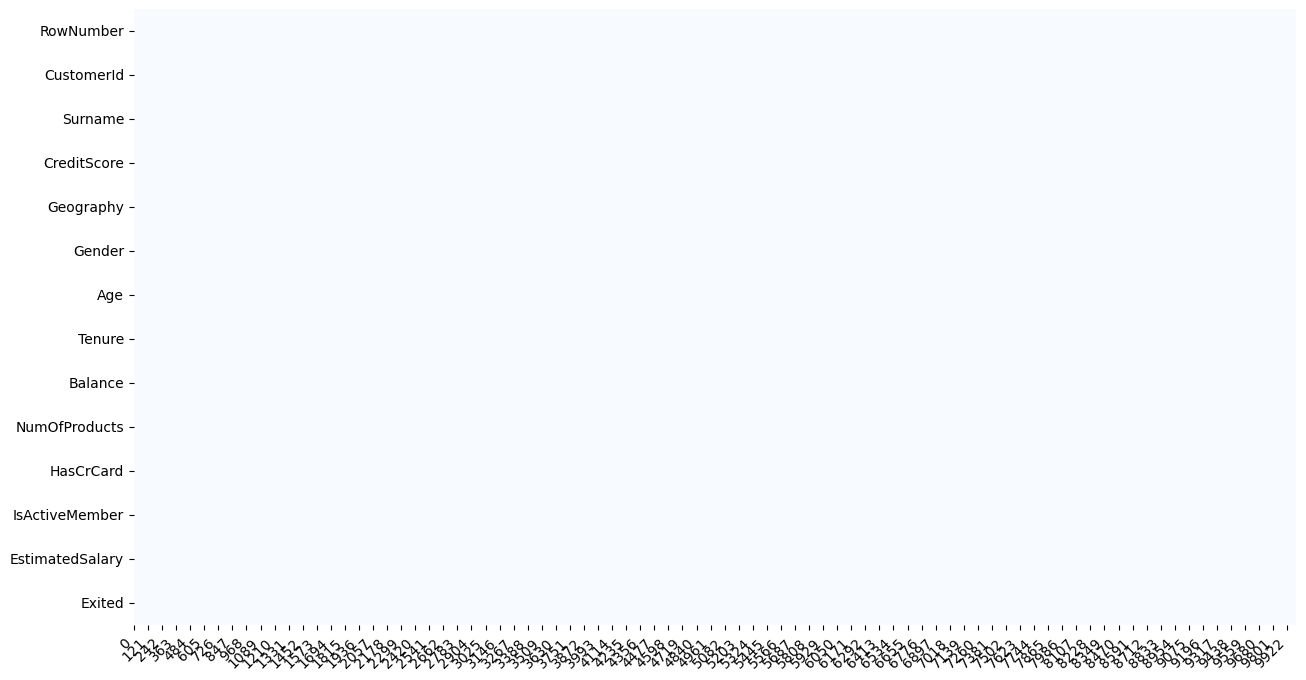

In [160]:
# Checking if our dataset contains any NULL values

plot_missing_value(data, return_df=True)

# DATA PREPROCESSING

In [161]:
# Removing the unnecessary features from the dataset
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Menyimpan dataset setelah clean dataset
data.to_csv('dataset_cleaned.csv', index=False)

print(data)


      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0   

In [162]:
# Encoding Categorical variables into numerical variables
# One Hot Encoding

data  = pd.read_csv("dataset_cleaned.csv")
region_names_list = data["Geography"].unique()
region_names_series = pd.Series(region_names_list)
# region_data = df["region"].tolist()
# print(region_names_list)

# Label Encoding pada kolom Geography
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])

# One-Hot Encoding pada kolom Geography
onehot_encoder = OneHotEncoder()
Geography_encoded = onehot_encoder.fit_transform(data['Geography'].values.reshape(-1, 1)).toarray()
Geography_encoded = pd.DataFrame(Geography_encoded, columns=['Geography_encode' + str(int(i)) for i in range(Geography_encoded.shape[1])])

# Gabungkan hasil encoding ke dalam dataframe
data = pd.concat([data, Geography_encoded], axis=1)

# Hapus kolom asli 'Geography'
data.drop(['Geography'], axis=1, inplace=True)

# Label Encoding pada kolom Gender
onehot_encoder = OneHotEncoder(sparse=False)
gender_encoded = onehot_encoder.fit_transform(data[['Gender']])
gender_encoded = pd.DataFrame(gender_encoded, columns=['Female', 'Male'])

# Gabungkan hasil encoding ke dalam dataframe
data = pd.concat([data, gender_encoded], axis=1)

# Hapus kolom asli 'Gender'
data.drop(['Gender'], axis=1, inplace=True)

# menyimpan data encoded
data.to_csv('dataset_cleaned_encode.csv', index=False)

print(data)
data.head()


      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_encode0  \
0                  1        101348.88       1                1.0   
1          

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_encode0,Geography_encode1,Geography_encode2,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,1.0,0.0


In [163]:
# splitting the dataset into x(independent variables) and y(dependent variables)

# Spliting dataset 80% dan 20%
X = data.drop(columns="Exited")
y = data["Exited"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train.columns)

(8000, 13) (2000, 13) (8000,) (2000,)
Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_encode0',
       'Geography_encode1', 'Geography_encode2', 'Female', 'Male'],
      dtype='object')


In [164]:
# Feature Scaling 
# Only on Independent Variable to convert them into values ranging from -1 to +1

from sklearn.preprocessing import StandardScaler

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Pilih kolom-kolom yang akan di-scaling
columns_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# Lakukan feature scaling pada kolom-kolom yang dipilih
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Cetak hasil feature scaling
print(data.head())

   CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
0    -0.326221  0.293517 -1.041760 -1.225848      -0.911583   0.646092   
1    -0.440036  0.198164 -1.387538  0.117350      -0.911583  -1.547768   
2    -1.536794  0.293517  1.032908  1.333053       2.527057   0.646092   
3     0.501521  0.007457 -1.387538 -1.225848       0.807737  -1.547768   
4     2.063884  0.388871 -1.041760  0.785728      -0.911583   0.646092   

   IsActiveMember  EstimatedSalary  Exited  Geography_encode0  \
0        0.970243         0.021886       1                1.0   
1        0.970243         0.216534       0                0.0   
2       -1.030670         0.240687       1                1.0   
3       -1.030670        -0.108918       0                1.0   
4        0.970243        -0.365276       0                0.0   

   Geography_encode1  Geography_encode2  Female  Male  
0                0.0                0.0     1.0   0.0  
1                0.0                1.0     1.0   0.

# LOGISTIC REGRESSION

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

training_accuracy = model.score(X_train, y_train)
testing_accuracy = model.score(X_test, y_test)

print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Training Accuracy: 0.787625
Testing Accuracy: 0.8005
Confusion Matrix:
[[1573   34]
 [ 365   28]]


# SUPPORT  VECTOR MACHINE

In [166]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

training_accuracy = model.score(X_train, y_train)
testing_accuracy = model.score(X_test, y_test)

print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Training Accuracy: 0.7945
Testing Accuracy: 0.8035
Confusion Matrix:
[[1607    0]
 [ 393    0]]


In [167]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print(cvs)

[0.795   0.795   0.795   0.795   0.795   0.795   0.79375 0.79375 0.79375
 0.79375]


# MULTILAYER ANN

In [168]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Initialising ANN

# define the keras model
model = Sequential()
model.add(Dense(6, input_shape=(13,), activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [169]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=50, batch_size=10)

Epoch 1/50
800/800 [==============================] - 2s 2ms/step - loss: 1383.0691 - accuracy: 0.6281 - val_loss: 37.6090 - val_accuracy: 0.7600
Epoch 2/50
800/800 [==============================] - 1s 2ms/step - loss: 31.3785 - accuracy: 0.7236 - val_loss: 30.1286 - val_accuracy: 0.7510
Epoch 3/50
800/800 [==============================] - 1s 1ms/step - loss: 18.6761 - accuracy: 0.7251 - val_loss: 20.3285 - val_accuracy: 0.8035
Epoch 4/50
800/800 [==============================] - 1s 2ms/step - loss: 14.9807 - accuracy: 0.7318 - val_loss: 14.8639 - val_accuracy: 0.4790
Epoch 5/50
800/800 [==============================] - 1s 2ms/step - loss: 13.6981 - accuracy: 0.7335 - val_loss: 6.4769 - val_accuracy: 0.7450
Epoch 6/50
800/800 [==============================] - 1s 2ms/step - loss: 13.3024 - accuracy: 0.7303 - val_loss: 12.1846 - val_accuracy: 0.8035
Epoch 7/50
800/800 [==============================] - 1s 2ms/step - loss: 11.1654 - accuracy: 0.7360 - val_loss: 15.0246 - val_accuracy

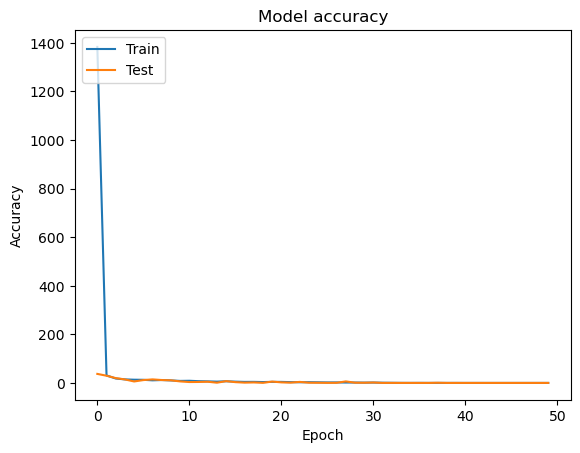

In [170]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [171]:
'''
predicting if the costumer having following information will leave the bank or not ?

Geography : france
Age = 50
Credit score = 850
Tenure = 4
Balance = 150000
Number of Products = 5
Gender = Female
Has Credit Card = yes
Is Active Member = yes
Estimated Salary = 85000
'''

# Inisialisasi StandardScaler
sc = StandardScaler()

# Scaling data pelatihan
X_train = sc.fit_transform(X_train)

# Scaling data pengujian
X_test = sc.transform(X_test)

# Buat data prediksi baru
new_data = np.array([[850, 50, 4, 150000, 5, 1, 1, 85000, 1, 0, 0, 1, 0]])

# Ambil dataset encode
new_data = pd.DataFrame({
    'CreditScore': [-0.326221],  
    'Age': [0.293517],
    'Tenure': [-1.041760],
    'Balance': [-1.225848],
    'NumOfProducts': [-0.911583],
    'HasCrCard': [0.646092],
    'IsActiveMember': [0.970243],
    'EstimatedSalary': [0.021886],
    'Geography_encode0': [1.0],
    'Geography_encode1': [0.0],
    'Geography_encode2': [0.0],
    'Female': [1.0],
    'Male': [0.0]
})

# Lakukan prediksi
new_prediction = model.predict(new_data)

# Ubah hasil prediksi menjadi "Yes" atau "No"
result = "Yes" if new_prediction[0] == 1 else "No"

print("Will the customer leave the bank?:", result)

1/1 [==============================] - 0s 41ms/step
Will the customer leave the bank?: No
